In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# NumPy: Beginner's Guide - Third Edition

In [2]:
i2 = eye(2)

In [3]:
i2

array([[1., 0.],
       [0., 1.]])

In [4]:
savetxt('eye.txt', i2)

# Loading from a CSV with NumPy

In [5]:
c,v = loadtxt('data.csv', delimiter=',' , usecols=(6,7), unpack=True)

In [6]:
c

336.1

In [7]:
v

21144800.0

# Calculating the Volume Weighted Average Price

1. Read the data into arrays
2. Calculate the Volume Weighted Average Price (**VWAP**)

In [28]:
from __future__ import print_function

c,v = loadtxt('data.csv', delimiter=',' , usecols=(6,7), unpack=True)
vwap = average(c, weights=v)
print("VWAP = ", vwap)

VWAP =  350.5895493532009


In [29]:
vwap

350.5895493532009

## Mean function

In [30]:
print(f"mean = {mean(c)}")

mean = 351.0376666666667


# Time weighted average price

In [33]:
t = arange(len(c))
time_weighted_average = average(c, weights=t)
print(f"twap = {time_weighted_average}")

twap = 352.4283218390804


# Highest and Lowest values


In [34]:
h,l=np.loadtxt('data.csv', delimiter=',', usecols=(4,5), unpack=True)
print("highest =", max(h))
print("lowest =", min(l))
print((max(h) + min(l)) /2)

print("Spread high price", ptp(h))
print("Spread low price", ptp(l))


highest = 364.9
lowest = 333.53
349.215
Spread high price 24.859999999999957
Spread low price 26.970000000000027


# Stats

In [42]:
c= loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)
print("median =", median(c))
sorted = msort(c)
print("sorted =", sorted)

N = len(c)
index = int((N - 1)/2)
print(index)
print("middle =", sorted[index])
print("average middle =", (sorted[int(N /2)] + sorted[int((N - 1) / 2)]) / 2)

print("variance =", var(c))
print("variance from definition =", mean((c - c.mean())**2))



median = 352.055
sorted = [336.1  338.61 339.32 342.62 342.88 343.44 344.32 345.03 346.5  346.67
 348.16 349.31 350.56 351.88 351.99 352.12 352.47 353.21 354.54 355.2
 355.36 355.76 356.85 358.16 358.3  359.18 359.56 359.9  360.   363.13]
14
middle = 351.99
average middle = 352.055
variance = 50.126517888888884
variance from definition = 50.126517888888884


# Analyzing Stock Returns

In [43]:
c=loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)

returns = diff( c ) / c[ : -1]
print("Standard deviation =", std(returns))

logreturns = diff( log(c) )

posretindices = where(returns > 0)
print("Indices with positive returns", posretindices)

annual_volatility = std(logreturns)/mean(logreturns)
annual_volatility = annual_volatility / sqrt(1./252.)
print("Annual volatility", annual_volatility)

print("Monthly volatility", annual_volatility * sqrt(1./12.))

Standard deviation = 0.012922134436826306
Indices with positive returns (array([ 0,  1,  4,  5,  6,  7,  9, 10, 11, 12, 16, 17, 18, 19, 21, 22, 23,
       25, 28]),)
Annual volatility 129.27478991115132
Monthly volatility 37.318417377317765


# Dates


In [47]:
from datetime import datetime

# Monday 0
# Tuesday 1
# Wednesday 2
# Thursday 3
# Friday 4
# Saturday 5
# Sunday 6
def datestr2num(s):
   return datetime.strptime(s.decode('ascii'), "%d-%m-%Y").date().weekday()

dates, close=loadtxt('data.csv', delimiter=',', usecols=(1,6), converters={1: datestr2num}, unpack=True)
print("Dates =", dates)

averages = zeros(5)

for i in range(5):
   indices = where(dates == i) 
   prices = take(close, indices)
   avg = mean(prices)
   print("Day", i, "prices", prices, "Average", avg)
   averages[i] = avg


top = max(averages)
print("Highest average", top)
print("Top day of the week", argmax(averages))

bottom = min(averages)
print("Lowest average", bottom)
print("Bottom day of the week", argmin(averages))

Dates = [4. 0. 1. 2. 3. 4. 0. 1. 2. 3. 4. 0. 1. 2. 3. 4. 1. 2. 3. 4. 0. 1. 2. 3.
 4. 0. 1. 2. 3. 4.]
Day 0 prices [[339.32 351.88 359.18 353.21 355.36]] Average 351.7900000000001
Day 1 prices [[345.03 355.2  359.9  338.61 349.31 355.76]] Average 350.63500000000005
Day 2 prices [[344.32 358.16 363.13 342.62 352.12 352.47]] Average 352.1366666666666
Day 3 prices [[343.44 354.54 358.3  342.88 359.56 346.67]] Average 350.8983333333333
Day 4 prices [[336.1  346.5  356.85 350.56 348.16 360.   351.99]] Average 350.0228571428571
Highest average 352.1366666666666
Top day of the week 2
Lowest average 350.0228571428571
Bottom day of the week 4


## Using the maximum and minimum functions

In [48]:
h, l, c = np.loadtxt('data.csv', delimiter=',', usecols=(4, 5, 6), unpack=True)

N = 5
h = h[-N:]
l = l[-N:]

print("len(h)", len(h), "len(l)", len(l))
print("Close", c)
previousclose = c[-N -1: -1]

print("len(previousclose)", len(previousclose))
print("Previous close", previousclose)
truerange = maximum(h - l, h - previousclose, previousclose - l)

print("True range", truerange)

atr = zeros(N)

atr[0] = mean(truerange)

for i in range(1, N):
   atr[i] = (N - 1) * atr[i - 1] + truerange[i]
   atr[i] /= N

print("ATR", atr)

len(h) 5 len(l) 5
Close [336.1  339.32 345.03 344.32 343.44 346.5  351.88 355.2  358.16 354.54
 356.85 359.18 359.9  363.13 358.3  350.56 338.61 342.62 342.88 348.16
 353.21 349.31 352.12 359.56 360.   355.36 355.76 352.47 346.67 351.99]
len(previousclose) 5
Previous close [360.   355.36 355.76 352.47 346.67]
True range [10.36  5.15  4.16  4.87  7.32]
ATR [6.372     6.1276    5.73408   5.561264  5.9130112]


## Simple moving average

Weights [0.2 0.2 0.2 0.2 0.2]


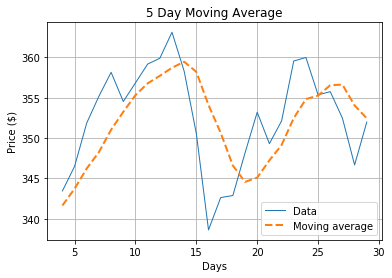

In [51]:
import matplotlib.pyplot as plt

N = 5

weights = np.ones(N) / N
print("Weights", weights)

c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)
sma = np.convolve(weights, c)[N-1:-N+1]
t = np.arange(N - 1, len(c))
plt.plot(t, c[N-1:], lw=1.0, label="Data")
plt.plot(t, sma, '--', lw=2.0, label="Moving average")
plt.title("5 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()

## Exponential Moving Average

Exp [ 1.          2.71828183  7.3890561  20.08553692 54.59815003]
Linspace [-1.   -0.75 -0.5  -0.25  0.  ]
Weights [0.11405072 0.14644403 0.18803785 0.24144538 0.31002201]


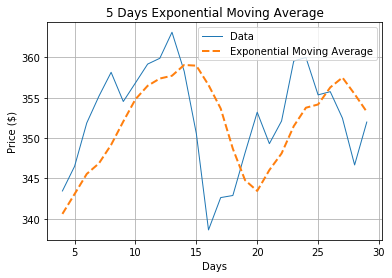

In [52]:
import matplotlib.pyplot as plt

x = np.arange(5)
print("Exp", np.exp(x))
print("Linspace", np.linspace(-1, 0, 5))

# Calculate weights
N = 5
weights = np.exp(np.linspace(-1., 0., N))

# Normalize weights
weights /= weights.sum()
print("Weights", weights)

c = np.loadtxt('data.csv', delimiter=',', usecols=(6,), unpack=True)
ema = np.convolve(weights, c)[N-1:-N+1]
t = np.arange(N - 1, len(c))
plt.plot(t, c[N-1:], lw=1.0, label='Data')
plt.plot(t, ema, '--', lw=2.0, label='Exponential Moving Average')
plt.title('5 Days Exponential Moving Average')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()